## Modeling the effect of carbonic anhydrase expression
We are using a linearized differential equation model of $CO_2$ and $HCO_3^{-}$ fluxes across the cell membrane and inside the cytosol. 

$\frac{dC_{in}}{dt} = \alpha (C_{out} - C_{in}) - \gamma C_{in} - \delta C_{in} + \phi H_{in}$

$\frac{dH_{in}}{dt} = \beta (H_{out} - H_{in}) + \delta C_{in} - \phi H_{in} - \omega H_{in}$

Here $C_{in}$ and $H_{in}$ are the intracellular $CO_2$ and $HCO_3^{-}$ concentrations respectively. $C_{out}$ and $H_{out}$ are the extracellular concentrations, which we assume to be in a pH-dependent equilibrium such that

$\frac{H_{out}}{C_{out}} = K_{EQ}(pH)$

In this linearized system, $\gamma C_{in}$ represents the rate of intracellular $CO_2$ fixation by rubisco and $\delta C_{in} - \phi H_{in}$ is the balance of the reversible $CO_2$ hydration reaction by carbonic anhydrase. $\alpha$ and $\beta$ are permeability coefficients for $CO_2$ and $HCO_3^{-}$, respectively, and $\omega H_{in}$ is the rate of $HCO_3^{-}$ dependent carboxylation. Note that several $HCO_3^{-}$ dependent carboxylation are required for the production of key precursors of lipids, amino acids and proteins. Hereafter we refer to carboxylation of $HCO_3^{-}$ as "H-carboxylation." 

## Assumptions
As the diffusion coefficients associated with small molecules (e.g. $CO_2$ and $HCO_3^{-}$) in water are ≈1000 $\mu m^2 /s$, such molecules diffuse very quickly across the micron length scales of bacterial cells with diffusion timescales $< 10^{-3}$. As a result, we assume spatial uniformity of $H_{in}$ and $C_{in}$ concentrations. We are also assuming a constant concentration of the rubisco co-substrate, ribulose 1,5-bisphosphate or RuBP, so that we can ignore this concentration when considering the reaction rate. 

Enzymatic rates are typically described as non-linear saturating functions of substrate concentrations. An irreversible Michaelis-Menten rate law has the form $V = k_{cat} [E] \frac{[S]}{K_M + [S]}$ where $[E]$ and $[S]$ are the enzyme and substrate concentrations respectively. In order to linearize this equation, we assume for both rubisco and carbonic anhydrase that $[S] \ll K_M$ so that $V \approx \frac{k_{cat}}{K_M} [E] [S]$. This assumption is reasonably justified as the $CO_2$ concentration in water in equilibrium with atmosphere is $\approx 15 \mu M$ at 25 $\deg C$ while the typical bacterial rubisco has a $K_M \approx 100 \mu M$. Similarly, typical $K_M$ values for carbonic anhydrases are in the $1-5 mM$ range. This linearization is appropriate only when we consider $CO_2$ and $HCO_3^{-}$ levels that are within a few fold of equilibrium with ambient air. We can also solve a non-linear version of the system where rubisco flux saturates at high $CO_2$ levels, but those solutions are considerably more complex. 

As $CO_2$ is smaller than $HCO_3^{-}$ and uncharged, it is typical to assume that the membrane permeability $\beta \ll \alpha$. We will not explicitly encode this assumption in the equations. Instead, we will plug in plausible empirically-derived values for $\beta$ and $\alpha$. 

## Steady-state solutions
We can solve this system at steady-state, which gives steady-state values for $C_{in}$ and $H_{in}$ as a function of the other parameters. In particular, we can calculate the flux through rubisco as

$\gamma C_{in} = \frac{\gamma  C_{out} (\alpha  (\beta +\omega +\phi )+\beta  K_{EQ}(pH) \phi
   )}{\alpha  (\beta +\omega +\phi )+\beta  (\gamma +\delta )+\gamma  \omega +\gamma 
   \phi +\delta  \omega }$
   
Similarly, we can calculate the rate of H-dependent carboxylation as 

$\omega H_{in} = \frac{C_{out} \omega  (\alpha  \delta +\beta  K_{EQ}(pH) (\alpha +\gamma
   +\delta ))}{\alpha  (\beta +\omega +\phi )+\beta  (\gamma +\delta )+\gamma  \omega
   +\gamma  \phi +\delta  \omega }$
   
Since rubisco and H-carboxylation are together responsible for the production of biomass carbon, we'll further assume that the rate of biomass production and, hence, the exponential growth rate $\lambda \propto \min(c \omega H_{in}, \gamma C_{in})$. Here $c \gg 1$ is a constant of proportionality reflecting the lesser contribution of H-carboxylation to biomass production. We will assume for the sake of plotting that $c = 100$, meaning that H-carboxylation contributes 1% of biomass carbon on a flux basis.  A more precise range of values could be calculated via flux balance analysis of autotrophic metabolism. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

In [2]:
# Lengths in micron units
cell_SA = 6 # square microns, BNID 101792
cell_V = 1.5 # cubic microns, BNID 114924
C_perm = 0.3*1e4 # microns/s, Flamholz & Mangan 2016
H_perm = 3e-3*1e4*np.power(10, 3.2-7.1) # microns/s, Flamholz & Mangan 2016

alpha = C_perm * cell_SA / cell_V
beta = H_perm * cell_SA / cell_V
print('alpha = {:1g} /s'.format(alpha))
print('beta = {:1g} /s'.format(beta))
print()

# Concentrations in micromolar units
pH_out = 7.1
pKa_eff = 6.1 # effective pKa between CO2 and bicarb
Cout = 15
Keq_pH = lambda p: np.power(10, p-pKa_eff)
Keq_out = Keq_pH(pH_out)
Hout = Keq_out*Cout

print('pH_out = {:1g}'.format(pH_out))
print('KEQ_out(pH) = {:1g}'.format(Keq_out))
print('Cout = {:1g} uM'.format(Cout))
print('Hout = {:1g} uM'.format(Hout))
print()

# We'll simplify the system by assuming pHout = pHin
pH_in = pH_out
Keq_in = Keq_pH(pH_in)
print('pH_in = {:1g}'.format(pH_in))
print('KEQ_in(pH) = {:1g}'.format(Keq_in))
# This forces a relationship between the CA kinetics (Haldane relation)
# Where KEQ = delta/phi = Hin/Cin at equilibrium

# We'll further assume that the H carboxylation is ≈1% of rubisco rate
# since rubisco is responsible for biomass carbon and H-carboxylation is
# responsible for much less. 10% is probably an overestimate. Regardless
# gamma = 10*omega

alpha = 12000 /s
beta = 0.0151071 /s

pH_out = 7.1
KEQ_out(pH) = 10
Cout = 15 uM
Hout = 150 uM

pH_in = 7.1
KEQ_in(pH) = 10


In [3]:
# Calculate the rubisco flux as a function of other params
def rub_flux_CA(a, b, g, d, phi, omega, c_out, k_eq):
    numerator = g * c_out * (a*(b+omega+phi) + b*k_eq*phi)
    denom = (a*(b+omega+phi) + b*(g+d) + 
             g*omega + g*phi + d*omega)
    return numerator/denom

# Calculate the flux through H-carboxylation as a function of the other params. 
def hcarb_flux_CA(a, b, g, d, phi, omega, c_out, k_eq):
    numerator = omega * c_out * (a*d + b*k_eq*(a+g+d))
    denom = (a*(b+omega+phi) + b*(g+d) + 
             g*omega + g*phi + d*omega)
    return numerator/denom

In [4]:
# Gamma is rubisco kcat/KM * enzyme concentration
# kcat ≈ 1-10 /s
# KM ≈ 100 uM
# concentration 1-100 uM
# so gamma is from 1e-2 to 1e3 /s
gamma = np.logspace(-2,3,100) # /s

# Delta is CA kcat/KM * enzyme concentration
# kcat / KM ≈ 1e-2 - 1e1 /uM/s depending on CA
# concentration 0.1-10 uM
# so delta is from 1e-3 to 1e2 /s for a CA.
# we will go much lower because we want to consider no CA at all. 
delta = np.logspace(-3,2,100) # /s

# 2d grid of rubisco and CA rates
G, D = np.meshgrid(gamma, delta)

# Omega is 1% of rubisco gamma
Omega = G / 100

# As we said above, phi = delta/KEQ
Phi = D / Keq_in

rub_fluxes = rub_flux_CA(alpha, beta, G, D, Phi, Omega, Cout, Keq_pH(pH_in))
hcarb_fluxes = hcarb_flux_CA(alpha, beta, G, D, Phi, Omega, Cout, Keq_pH(pH_in))

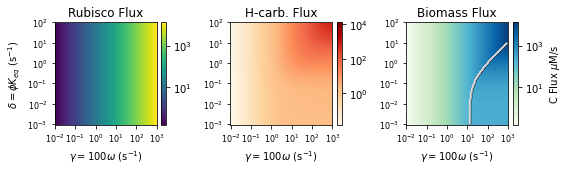

In [5]:
fig, axs = plt.subplots(ncols=3, figsize=(8,4))

plt.sca(axs[0])
lnorm = LogNorm(rub_fluxes.min(), rub_fluxes.max())
plt.imshow(rub_fluxes, norm=lnorm, origin='lower')
plt.colorbar(fraction=0.046, pad=0.04)

plt.ylabel('$\delta = \phi K_{eq}$ (s$^{-1}$)')
plt.title('Rubisco Flux')

plt.sca(axs[1])
lnorm = LogNorm(hcarb_fluxes.min(), rub_fluxes.max())
plt.imshow(hcarb_fluxes, norm=lnorm, cmap='OrRd', origin='lower')
plt.colorbar(fraction=0.046, pad=0.04)

plt.title('H-carb. Flux')

plt.sca(axs[2])
biomass_c_flux = np.minimum(rub_fluxes, 100*hcarb_fluxes)
lnorm = LogNorm(biomass_c_flux.min(), biomass_c_flux.max())
plt.imshow(biomass_c_flux, norm=lnorm, cmap='GnBu', origin='lower')
plt.colorbar(fraction=0.046, pad=0.04, label='C Flux $\mu$M/s')

# Draw the boundary where rubisco becomes growth-limiting.
mask = np.where(rub_fluxes < 100*hcarb_fluxes)
boundary = np.zeros(biomass_c_flux.shape)
boundary[mask] = 1
plt.contour(boundary, cmap='gray')
                    
plt.title('Biomass Flux')

# x & y ticks with values
xs = np.arange(0, 101, 20)
ys = np.arange(0, 101, 20)
for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(xs, [r'$10^{%d}$' % i for i in range(-2,4)], fontsize=8)
    plt.yticks(ys, [r'$10^{%d}$' % i for i in range(-3,3)], fontsize=8)
    plt.xlabel('$\gamma = 100 \omega$ (s$^{-1}$)')

plt.tight_layout()
plt.show()

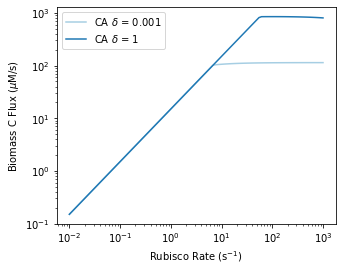

In [6]:
# 2D projection of same figure
plt.figure(figsize=(5,4))
pal = sns.color_palette('Paired')

# omega is 1% of rubisco gamma
little_omega = gamma / 100
# phi = delta/KEQ
little_phi = delta / Keq_in

for idx, delta_val in enumerate([1e-3, 1]):
    rub_flux = rub_flux_CA(alpha, beta, gamma, delta_val, little_phi, little_omega, Cout, Keq_pH(pH_in))
    hcarb_flux = hcarb_flux_CA(alpha, beta, gamma, delta_val, little_phi, little_omega, Cout, Keq_pH(pH_in))
    biomass_c_flux = np.minimum(rub_flux, 100*hcarb_flux)

    plt.loglog(gamma, biomass_c_flux, color=pal[idx], label='CA $\delta$ = {0:.2g}'.format(delta_val))

plt.legend()
plt.xlabel('Rubisco Rate (s$^{-1}$)')
plt.ylabel('Biomass C Flux ($\mu$M/s)')
plt.show()

## Modeling the effect of Ci transporter expression
A similar model can be used to address the effect of expressing energy-coupled inorganic carbon transporters (e.g. DAB-type complexes). In this model we omit the expression associated with the cell-permeability of $HCO_3^-$ and replace it with a first-order relation $\chi H_out$ reflecting the rate of inorganic carbon uptake 

$\frac{dC_{in}}{dt} = \alpha (C_{out} - C_{in}) - \gamma C_{in} - \delta C_{in} + \phi H_{in}$

$\frac{dH_{in}}{dt} = \chi H_{out} + \delta C_{in} - \phi H_{in} - \omega H_{in}$

This system of equations can be solved in steady state to give rubisco and H-carboxylation rates as above. 

$\gamma C_{in} = \frac{\gamma  C_{out} (\alpha  (\omega +\phi ) + K_{EQ} \chi  \phi
   )}{\alpha  (\omega +\phi )+\gamma  (\omega +\phi )+\delta  \omega }$
   
$\omega H_{in} = \frac{C_{out} \omega  (\alpha  (\delta +K_{EQ} \chi ) + K_{EQ} \chi 
   (\gamma +\delta ))}{\alpha  (\omega +\phi )+\gamma  (\omega +\phi )+\delta  \omega}$

For the moment, we will also assume that there is no carbonic anhydrase in the system, i.e. that $\delta$ and $\phi$ are small. To explore this limit, we will a more explicit equation, substituting $\delta = \delta' \times [CA]$ and $\phi = \phi' \times [CA]$ to reflect the fact that both directions are catalyzed by an enzyme. In the limit where $[CA] \to 0$ we can give approximate steady state solutions for rubisco and H-carboxylation rates as above (by taking the zeroth order series expansion about [CA] = 0). In this limit we get 

$\gamma C_{in} \approx \frac{C_{out} \gamma}{\alpha + \gamma}$
   
$\omega H_{in} \approx C_{out} K_{EQ} \chi$

In [7]:
# Calculate the rubisco flux as a function of other params
def rub_flux_DAB_0order(a, b, g, x, omega, c_out, k_eq):
    numerator = c_out * g
    denom = (a + g)
    return numerator/denom

# Calculate the flux through H-carboxylation as a function of the other params. 
def hcarb_flux_DAB_0order(a, b, g, x, omega, c_out, k_eq):
    return c_out * k_eq * (b+x) * omega / (b+omega)

In [17]:
# Mangan & Flamholz 2016 considers a range of 1e-5 to 1e0 cm/s for Ci uptake (Jc)
# Jc * 1e4 * SA/V gives our chi value in /s units
chi = np.logspace(-8,6,100)

# 2d grid of rubisco and Ci uptake rates
G, X = np.meshgrid(gamma, chi)

# Omega is 1% of rubisco gamma
Omega = G / 100

rub_fluxes = rub_flux_DAB_0order(alpha, beta, G, X, Omega, Cout, Keq_pH(pH_in))
hcarb_fluxes = hcarb_flux_DAB_0order(alpha, beta, G, X, Omega, Cout, Keq_pH(pH_in))

<ipython-input-18-cf0ce15be508>:28: UserWarning: No contour levels were found within the data range.
  plt.contour(boundary, cmap='gray')


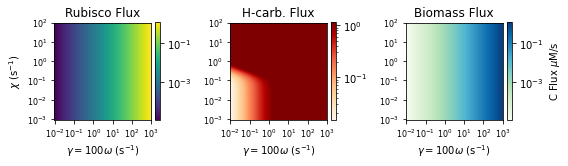

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(8,4))

plt.sca(axs[0])
lnorm = LogNorm(rub_fluxes.min(), rub_fluxes.max())
plt.imshow(rub_fluxes, norm=lnorm, origin='lower')
plt.colorbar(fraction=0.046, pad=0.04)

plt.ylabel('$\chi$ (s$^{-1}$)')
plt.title('Rubisco Flux')

plt.sca(axs[1])
lnorm = LogNorm(hcarb_fluxes.min(), rub_fluxes.max())
plt.imshow(hcarb_fluxes, norm=lnorm, cmap='OrRd', origin='lower')
plt.colorbar(fraction=0.046, pad=0.04)

plt.title('H-carb. Flux')

plt.sca(axs[2])
biomass_c_flux = np.minimum(rub_fluxes, 100*hcarb_fluxes)
lnorm = LogNorm(biomass_c_flux.min(), biomass_c_flux.max())
plt.imshow(biomass_c_flux, norm=lnorm, cmap='GnBu', origin='lower')
plt.colorbar(fraction=0.046, pad=0.04, label='C Flux $\mu$M/s')

# Draw the boundary where rubisco becomes growth-limiting.
mask = np.where(rub_fluxes < 100*hcarb_fluxes)
boundary = np.zeros(biomass_c_flux.shape)
boundary[mask] = 1
plt.contour(boundary, cmap='gray')
                    
plt.title('Biomass Flux')

# x & y ticks with values
xs = np.arange(0, 101, 20)
ys = np.arange(0, 101, 20)
for ax in axs.flatten():
    plt.sca(ax)
    # fix ticks to match actual values
    plt.xticks(xs, [r'$10^{%d}$' % i for i in range(-2,4)], fontsize=8)
    plt.yticks(ys, [r'$10^{%d}$' % i for i in range(-3,3)], fontsize=8)
    plt.xlabel('$\gamma = 100 \omega$ (s$^{-1}$)')

plt.tight_layout()
plt.show()

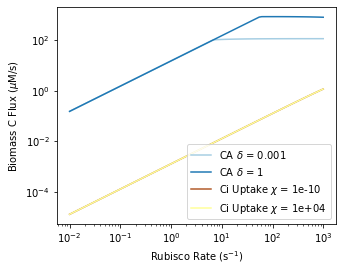

In [14]:
# 2D projection of same figures as above
plt.figure(figsize=(5,4))
pal = sns.color_palette('Paired')

# omega is 1% of rubisco gamma
little_omega = gamma / 100

# phi = delta/KEQ
little_phi = delta / Keq_in

for idx, delta_val in enumerate([1e-3, 1]):
    rub_flux = rub_flux_CA(alpha, beta, gamma, delta_val, little_phi, little_omega, Cout, Keq_pH(pH_in))
    hcarb_flux = hcarb_flux_CA(alpha, beta, gamma, delta_val, little_phi, little_omega, Cout, Keq_pH(pH_in))
    biomass_c_flux = np.minimum(rub_flux, 100*hcarb_flux)

    plt.loglog(gamma, biomass_c_flux, color=pal[idx], label='CA $\delta$ = {0:.2g}'.format(delta_val))

for idx, chi_val in enumerate([1e-10, 1e4]):
    rub_flux = rub_flux_DAB_0order(alpha, beta, gamma, chi_val, little_omega, Cout, Keq_pH(pH_in))
    hcarb_flux = hcarb_flux_DAB_0order(alpha, beta, gamma, chi_val, little_omega, Cout, Keq_pH(pH_in))
    biomass_c_flux = np.minimum(rub_flux, 100*hcarb_flux)

    plt.loglog(gamma, biomass_c_flux, color=pal[-1-idx], label='Ci Uptake $\chi$ = {0:.2g}'.format(chi_val))

plt.legend()
plt.xlabel('Rubisco Rate (s$^{-1}$)')
plt.ylabel('Biomass C Flux ($\mu$M/s)')
plt.show()

In [12]:
beta

0.015107104941530025

## Modeling the effect of co-expression of CA and Ci transport
Above we considered a simple model including both CA and activated HCO3- uptake in the limit where of ≈ 0 carbonic anhydrase activity. Here we consider that same model when there is nonzero CA activity. 

$\gamma C_{in} = \frac{\gamma  C_{out} (\alpha  \omega +\text{CA} \phi' (\alpha
   + K_{EQ} \chi ))}{\omega  (\alpha +\gamma +\text{CA} \delta')+\text{CA}
   \phi' (\alpha +\gamma )}$
   
$\omega H_{in} = \frac{C_{out} \omega  (\alpha  \text{CA} \delta' + K_{EQ} \chi 
   (\alpha +\gamma +\text{CA} \delta'))}{\omega  (\alpha +\gamma +\text{CA}
  \delta')+\text{CA} \phi' (\alpha +\gamma )}$
  
The variables of interest here are the amount of CA, the CA rate constants ($\delta' = K_{EQ} \phi'$) and the whole-cell rate of HCO3- pumping $\chi$. We will assume